In [1]:
## Overview:

## Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.
## Customer retention can be achieved with good customer service and products. 
## But the most effective way for a company to prevent attrition of customers is to truly know them. 

## Problem Statement: 
## The vast volumes of data collected about customers need to be used to build churn prediction models.

## Target Variable: Churn(Binary Categorical Variable)



In [2]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
df= pd.read_csv("Telecom_customer_churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
## We can see there are 7043 rows and 21 columns.
df.shape

(7043, 21)

In [6]:
## We can see there is no null value i the above data....
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
##It seems there is no missing values in df. Lets check null value of each columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [9]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Churn", axis=1)
y=df['Churn']

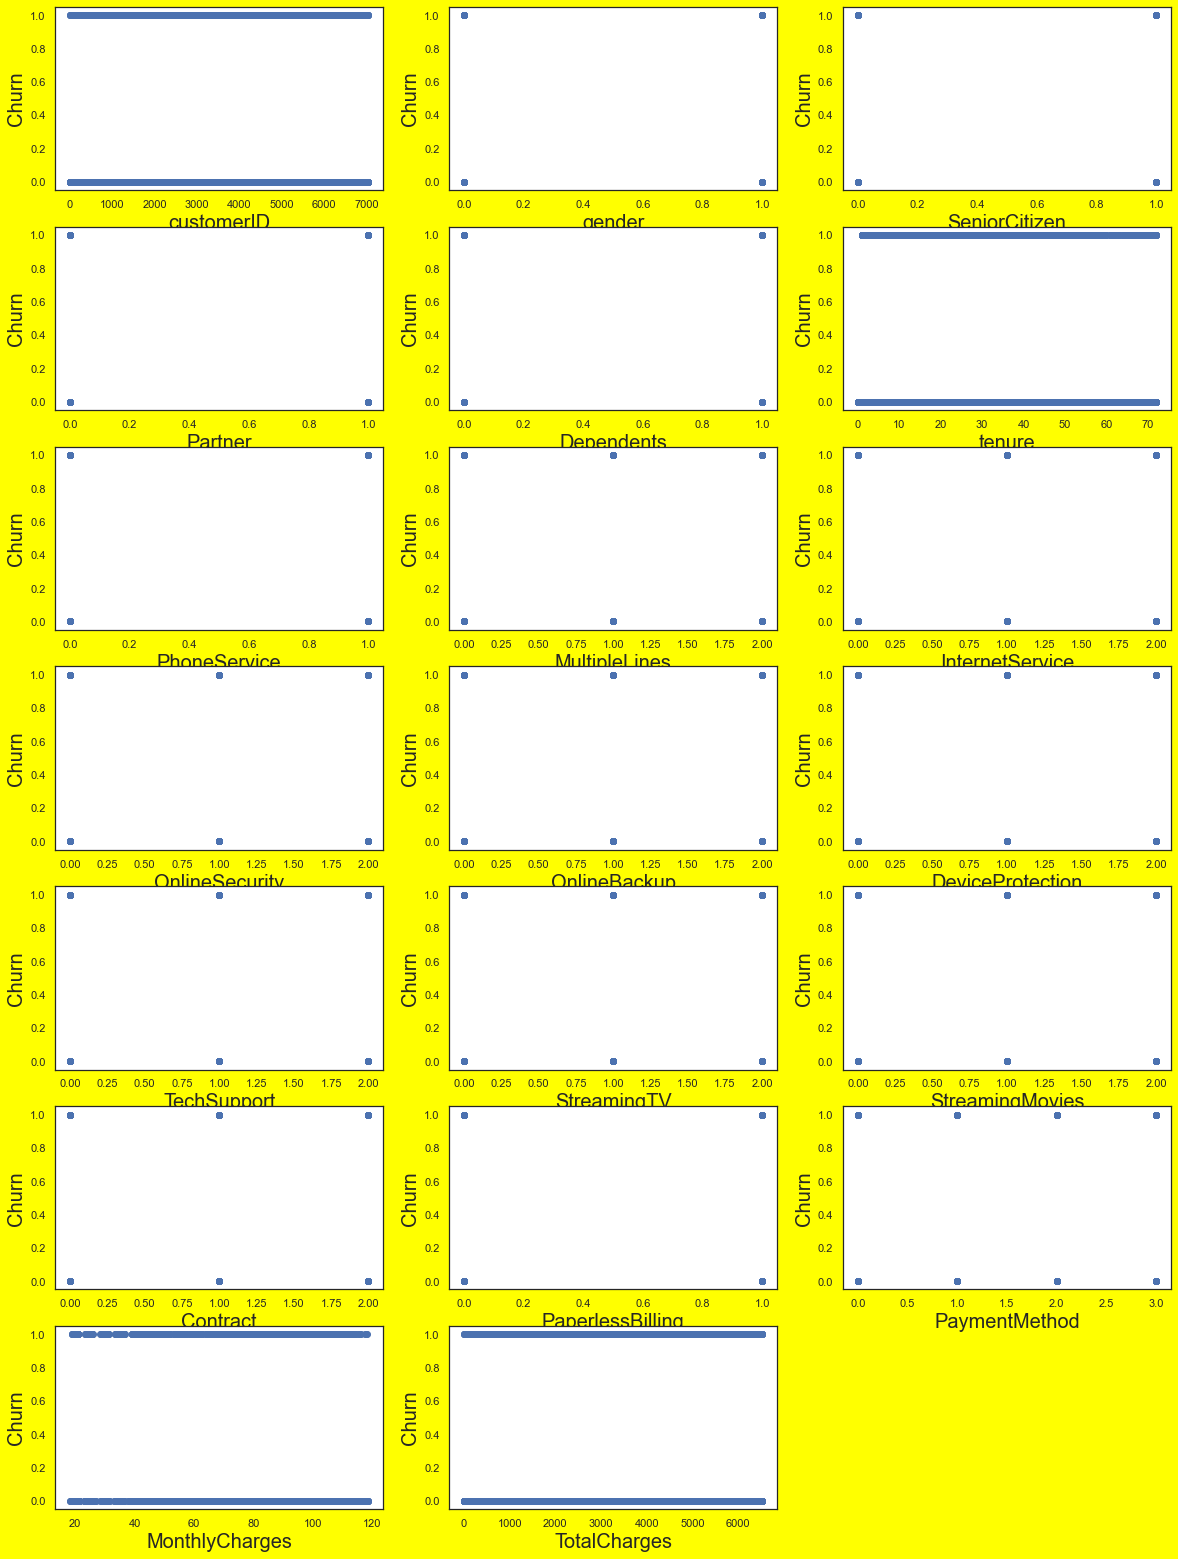

In [10]:
plt.figure(figsize=(20,60),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Churn',fontsize=20)
        
        plotnumber+=1
        
plt.show()

In [11]:
df=df.drop('customerID',axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


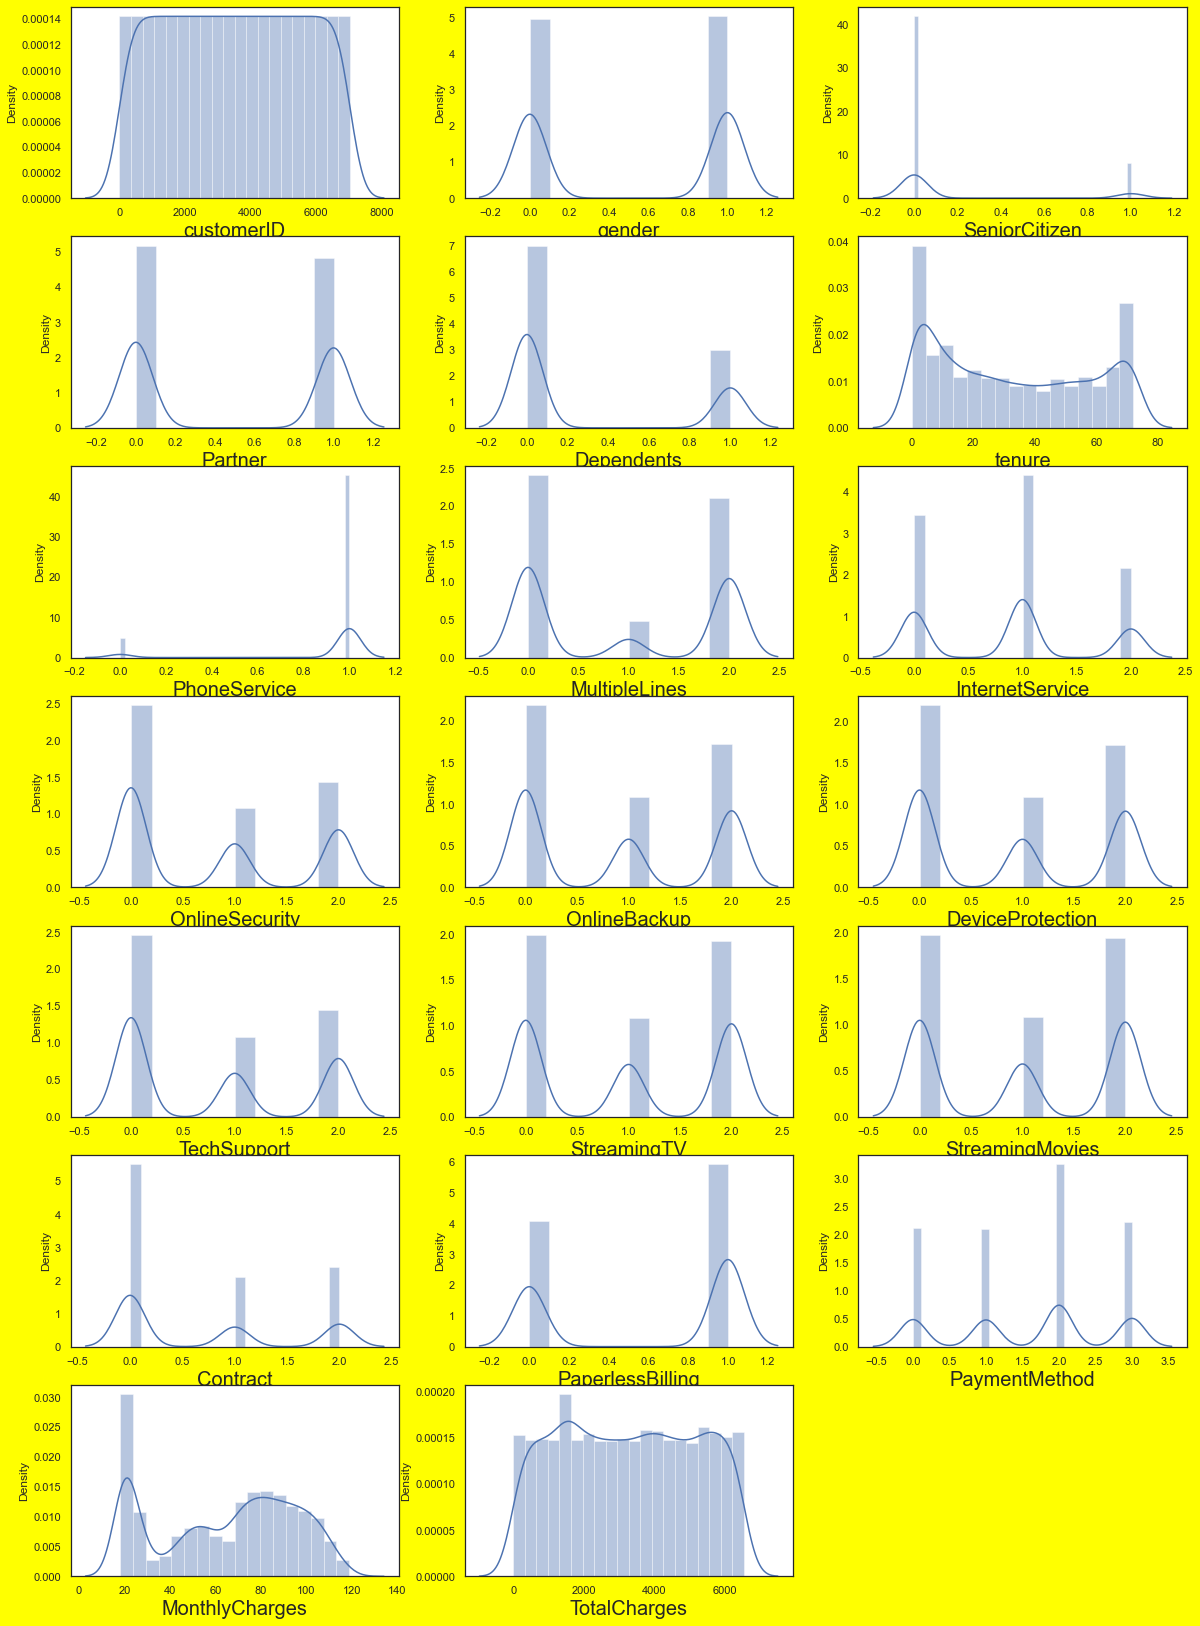

In [12]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [13]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

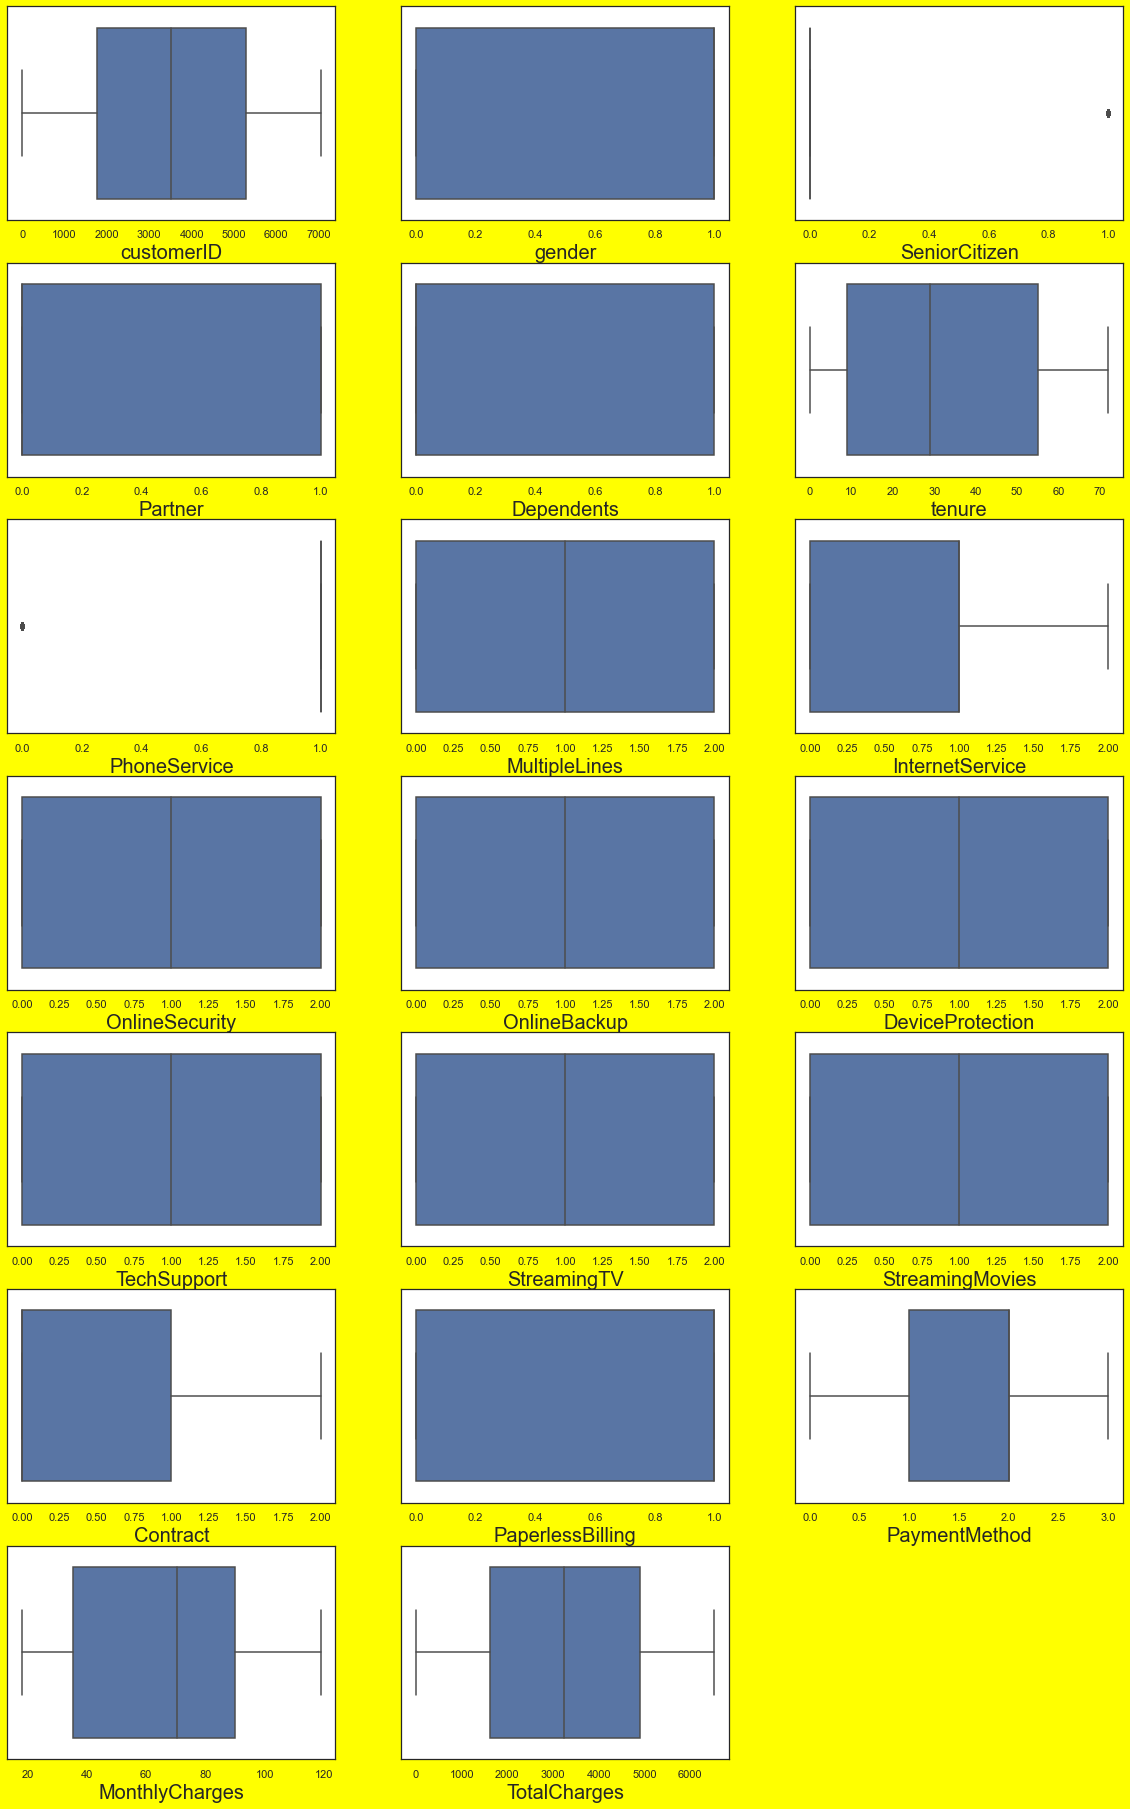

In [14]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,70),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=45:
        ax=plt.subplot(15,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [15]:
## We cansee there are outlier in some of columns. it is very less in number. Still I am using zscore method to remove outliers.

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [16]:
df= df[(z<3).all(axis=1)]
df.shape

(6361, 20)

In [17]:

Data_loss=((7043-6361)/7043)*100

Data_loss

9.683373562402386

In [18]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,3.556480,customerID
1,1.942648,gender
2,1.367362,SeniorCitizen
3,2.821161,Partner
4,1.955470,Dependents
5,7.488342,tenure
6,14.530031,PhoneService
7,2.755460,MultipleLines
8,4.331303,InternetService
9,2.260538,OnlineSecurity


In [20]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [22]:
## I am choosing this model because our taget variable is binary classification.
logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=40)

In [23]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

      Actual  Predicted
3035     0.0        0.0
3103     1.0        0.0
476      0.0        0.0
5245     0.0        0.0
6773     1.0        1.0

Confussion matrix:
[[939  97]
 [163 210]]


In [24]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.815471965933286


In [25]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1036
         1.0       0.68      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [26]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())

print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

      Actual  Predicted
185      1.0        1.0
2715     0.0        0.0
3825     0.0        0.0
1807     1.0        1.0
132      0.0        0.0

Confussion matrix:
[[944  92]
 [195 178]]


In [27]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.7963094393186657


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

      Actual  Predicted
185      1.0        1.0
2715     0.0        0.0
3825     0.0        0.0
1807     1.0        0.0
132      0.0        0.0

Confussion matrix:
[[964  72]
 [266 107]]


In [30]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.7601135557132718


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      1036
         1.0       0.60      0.29      0.39       373

    accuracy                           0.76      1409
   macro avg       0.69      0.61      0.62      1409
weighted avg       0.73      0.76      0.73      1409



In [32]:
## Conclusion:

##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy.
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also we  get to know that LogisticRegression has highest accuracy of 81.54%